# Activation Function
    - Sigmoid
    - Tanh
    - Rectified Linear Unit (ReLU)
#### Sigmoid Function
    - A = 1/(1 + e-x)
    - Value Range : 0 to 1

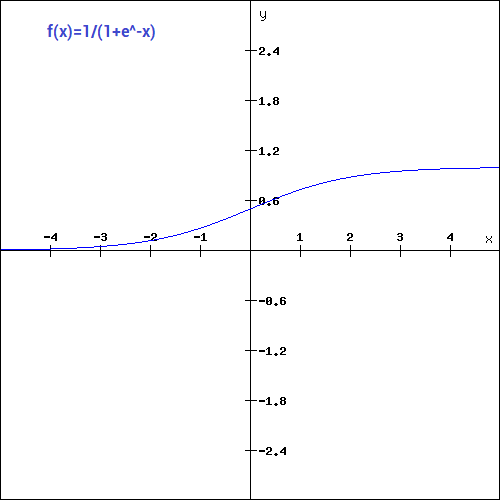

#### Tanh Function
    - f(x) = tanh(x) = 2/(1 + e-2x) - 1
    - tanh(x) = 2 * sigmoid(2x) - 1

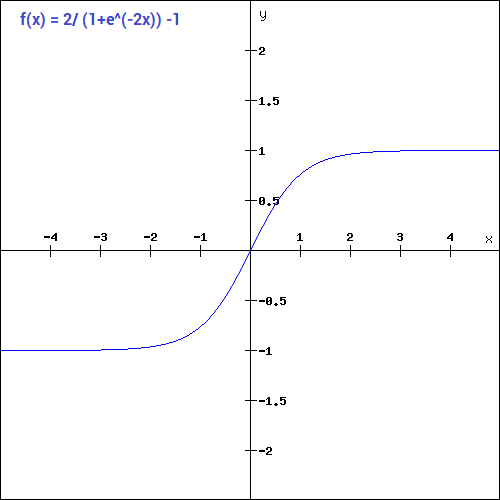

#### RELU
    - A(x) = max(0,x)
 
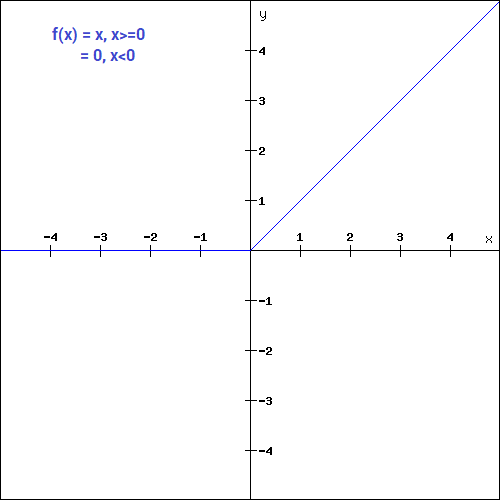


# - Observation made on every single Activation function in the hidden layer which impacts the most. 

"testing for the better activation function.ipynb"

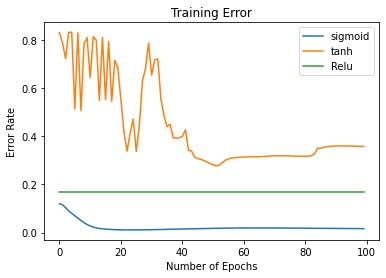

# - According to the above observation we are able to sigmoid function is showing a better results comapared to other two activation function

From the above observation sigmoid function gives the better result

# Sigmoid function
- The next activation function that we are going to look at is the Sigmoid function. It is one of the most widely used non-linear activation function. Sigmoid transforms the values between the range 0 and 1. Here is the mathematical expression for sigmoid - f(x) = 1/(1+e^-x)

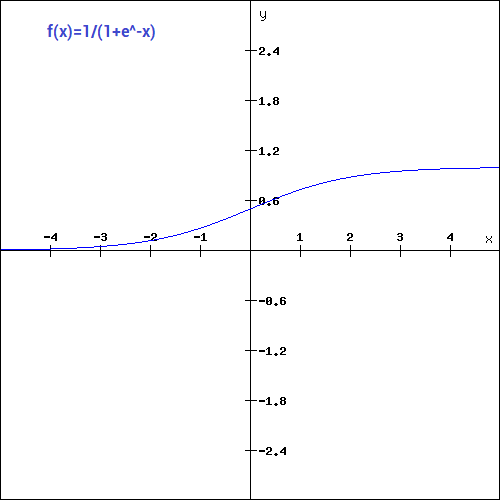

In [1]:
# Backprop on the Vowel Dataset
from random import seed
from random import randrange
from random import random
from csv import reader
from math import exp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
import numpy as np
import csv
 
# Load a CSV file
filename = "data.csv"
def loadCsv(filename):
        trainSet = []
        
        lines = csv.reader(open(filename, 'r'))
        dataset = list(lines)
        for i in range(len(dataset)):
                for j in range(4):
                        #print("DATA {}".format(dataset[i]))
                        dataset[i][j] = float(dataset[i][j])
                trainSet.append(dataset[i])
        return trainSet

def minmax(dataset):
        minmax = list()
        stats = [[min(column), max(column)] for column in zip(*dataset)]
        return stats
 
# Rescale dataset columns to the range 0-1
def normalize(dataset, minmax):
        for row in dataset:
                for i in range(len(row)-1):
                        row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Convert string column to float
def column_to_float(dataset, column):
        for row in dataset:
                try:
                        row[column] = float(row[column])
                except ValueError:
                        print("Error with row",column,":",row[column])
                        pass
 
# Convert string column to integer
def column_to_int(dataset, column):
        class_values = [row[column] for row in dataset]
        unique = set(class_values)
        lookup = dict()
        for i, value in enumerate(unique):
                lookup[value] = i
        for row in dataset:
                row[column] = lookup[row[column]]
        return lookup
 
# Find the min and max values for each column

 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
        dataset_split = list()
        dataset_copy = list(dataset)
        fold_size = int(len(dataset) / n_folds)
        for i in range(n_folds):
                fold = list()
                while len(fold) < fold_size:
                        index = randrange(len(dataset_copy))
                        fold.append(dataset_copy.pop(index))
                dataset_split.append(fold)
        return dataset_split
 
# Calculate accuracy percentage
def accuracy_met(actual, predicted):
        correct = 0
        for i in range(len(actual)):
                if actual[i] == predicted[i]:
                        correct += 1
        return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def run_algorithm(dataset, algorithm, n_folds, *args):
        
        folds = cross_validation_split(dataset, n_folds)
        #for fold in folds:
                #print("Fold {} \n \n".format(fold))
        scores = list()
        for fold in folds:
                #print("Test Fold {} \n \n".format(fold))
                train_set = list(folds)
                train_set.remove(fold)
                train_set = sum(train_set, [])
                test_set = list()
                for row in fold:
                        row_copy = list(row)
                        test_set.append(row_copy)
                        row_copy[-1] = None
                predicted = algorithm(train_set, test_set, *args)
                actual = [row[-1] for row in fold]
                accuracy = accuracy_met(actual, predicted)
                cm = confusion_matrix(actual, predicted)
                print('\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in cm]))
                #confusionmatrix = np.matrix(cm)
                FP = cm.sum(axis=0) - np.diag(cm)
                FN = cm.sum(axis=1) - np.diag(cm)
                TP = np.diag(cm)
                TN = cm.sum() - (FP + FN + TP)
                print('False Positives\n {}'.format(FP))
                print('False Negetives\n {}'.format(FN))
                print('True Positives\n {}'.format(TP))
                print('True Negetives\n {}'.format(TN))
                TPR = TP/(TP+FN)
                print('Sensitivity \n {}'.format(TPR))
                TNR = TN/(TN+FP)
                print('Specificity \n {}'.format(TNR))
                Precision = TP/(TP+FP)
                print('Precision \n {}'.format(Precision))
                Recall = TP/(TP+FN)
                print('Recall \n {}'.format(Recall))
                Acc = (TP+TN)/(TP+TN+FP+FN)
                print('Áccuracy \n{}'.format(Acc))
                Fscore = 2*(Precision*Recall)/(Precision+Recall)
                print('FScore \n{}'.format(Fscore))
                k=cohen_kappa_score(actual, predicted)
                print('Çohen Kappa \n{}'.format(k))
                scores.append(accuracy)
        return scores
 
# Calculate neuron activation for an input
def activate(weights, inputs):
        activation = weights[-1]
        for i in range(len(weights)-1):
                activation += weights[i] * inputs[i]
        return activation
 
# Transfer neuron activation
def transfer(activation):
        return 1.0 / (1.0 + exp(-activation))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
        inputs = row
        for layer in network:
                new_inputs = []
                for neuron in layer:
                        activation = activate(neuron['weights'], inputs)
                        neuron['output'] = transfer(activation)
                        new_inputs.append(neuron['output'])
                inputs = new_inputs
        return inputs
 
# Calculate the derivative of an neuron output
def transfer_derivative(output):
        return output * (1.0 - output)
 
# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
        for i in reversed(range(len(network))):
                layer = network[i]
                errors = list()
                if i != len(network)-1:
                        for j in range(len(layer)):
                                error = 0.0
                                for neuron in network[i + 1]:
                                        error += (neuron['weights'][j] * neuron['delta'])
                                errors.append(error)
                else:
                        for j in range(len(layer)):
                                neuron = layer[j]
                                errors.append(expected[j] - neuron['output'])
                for j in range(len(layer)):
                        neuron = layer[j]
                        neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])
 
# Update network weights with error
def update_weights(network, row, l_rate):
        for i in range(len(network)):
                inputs = row[:-1]                
                if i != 0:
                        inputs = [neuron['output'] for neuron in network[i - 1]]
                for neuron in network[i]:
                        for j in range(len(inputs)):
                                temp = l_rate * neuron['delta'] * inputs[j] + mu * neuron['prev'][j]
                                
                                neuron['weights'][j] += temp
                                #print("neuron weight{} \n".format(neuron['weights'][j]))
                                neuron['prev'][j] = temp
                        temp = l_rate * neuron['delta'] + mu * neuron['prev'][-1]
                        neuron['weights'][-1] += temp
                        neuron['prev'][-1] = temp
                                
 
# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs):
        for epoch in range(n_epoch):
                for row in train:
                        outputs = forward_propagate(network, row)
                        #print(network)
                        expected = [0 for i in range(n_outputs)]
                        expected[row[-1]] = 1
                        #print("expected row{}\n".format(expected))
                        backward_propagate_error(network, expected)
                        update_weights(network, row, l_rate)
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs):
        network = list()
        hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)], 'prev':[0 for i in range(n_inputs+1)]} for i in range(n_hidden)]        
        network.append(hidden_layer)
        hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)], 'prev':[0 for i in range(n_inputs+1)]} for i in range(n_hidden)]        
        network.append(hidden_layer)
        output_layer = [{'weights':[random() for i in range(n_hidden + 1)],'prev':[0 for i in range(n_hidden+1)]} for i in range(n_outputs)]
        network.append(output_layer)
        #print(network)
        return network
 
# Make a prediction with a network
def predict(network, row):
        outputs = forward_propagate(network, row)
        return outputs.index(max(outputs))
 
# Backpropagation Algorithm With Stochastic Gradient Descent
def back_propagation(train, test, l_rate, n_epoch, n_hidden):
        n_inputs = len(train[0]) - 1
        n_outputs = len(set([row[-1] for row in train]))
        network = initialize_network(n_inputs, n_hidden, n_outputs)
        train_network(network, train, l_rate, n_epoch, n_outputs)
        #print("network {}\n".format(network))
        predictions = list()
        for row in test:
                prediction = predict(network, row)
                predictions.append(prediction)
        return(predictions)
 
# Test Backprop on Seeds dataset
seed(1)
# load and prepare data
filename = 'data.csv'
dataset = loadCsv(filename)
for i in range(len(dataset[0])-1):
        column_to_float(dataset, i)
# convert class column to integers
column_to_int(dataset, len(dataset[0])-1)
# normalize input variables
minmax = minmax(dataset)
normalize(dataset, minmax)
# evaluate algorithm
n_folds = 5
l_rate = 0.5
mu=0.001
n_epoch = 1500
n_hidden = 4
scores = run_algorithm(dataset, back_propagation, n_folds, l_rate, n_epoch, n_hidden)

print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))



   7   1   0   0   6   3
   0   7   0   0   1   1
   0   0  19   0   8   0
   0   0   0  29   0   2
   0   0   1   0  46   0
   0   1   0   5   2  35
False Positives
 [ 0  2  1  5 17  6]
False Negetives
 [10  2  8  2  1  8]
True Positives
 [ 7  7 19 29 46 35]
True Negetives
 [157 163 146 138 110 125]
Sensitivity 
 [0.41176471 0.77777778 0.7037037  0.93548387 0.9787234  0.81395349]
Specificity 
 [1.         0.98787879 0.99319728 0.96503497 0.86614173 0.95419847]
Precision 
 [1.         0.77777778 0.95       0.85294118 0.73015873 0.85365854]
Recall 
 [0.41176471 0.77777778 0.7037037  0.93548387 0.9787234  0.81395349]
Áccuracy 
[0.94252874 0.97701149 0.94827586 0.95977011 0.89655172 0.91954023]
FScore 
[0.58333333 0.77777778 0.80851064 0.89230769 0.83636364 0.83333333]
Çohen Kappa 
0.772960686926509
   8   4   0   0   5   0
   0  20   0   0   0   1
   0   0  35   0   5   0
   0   0   0  25   0   3
   0   0   0   0  37   2
   0   1   0   1   1  26
False Positives
 [ 0  5  0  1 11  6]
False